In [1]:
# Import Library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import make_moons, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Using TensorFlow backend.


In [2]:
X_train,X_test = np.load('./test/X_train.npy'), np.load('./test/X_test.npy')
Y_train,Y_test = np.load('./test/Y_train.npy'), np.load('./test/Y_test.npy')

In [3]:
print(X_train,X_test,Y_train,Y_test)

[[[[0.9961 1.     1.    ]
   [0.9961 1.     1.    ]
   [0.9961 1.     1.    ]
   ...
   [0.9961 1.     1.    ]
   [1.     0.9961 1.    ]
   [1.     0.9961 1.    ]]

  [[0.9961 1.     1.    ]
   [0.9961 1.     1.    ]
   [0.9961 1.     1.    ]
   ...
   [0.9961 1.     1.    ]
   [1.     0.9961 1.    ]
   [1.     0.9961 1.    ]]

  [[0.9961 1.     1.    ]
   [0.9961 1.     1.    ]
   [0.9961 1.     1.    ]
   ...
   [0.9961 1.     1.    ]
   [1.     1.     1.    ]
   [1.     0.9961 1.    ]]

  ...

  [[0.9843 1.     0.9804]
   [0.9882 1.     0.9804]
   [1.     1.     0.9843]
   ...
   [1.     1.     0.9804]
   [0.9961 1.     0.9804]
   [0.9961 1.     0.9804]]

  [[0.9843 1.     0.9804]
   [0.9882 1.     0.9804]
   [1.     1.     0.9843]
   ...
   [0.9961 1.     0.9804]
   [0.9961 1.     0.9804]
   [0.9961 1.     0.9804]]

  [[0.9843 1.     0.9804]
   [0.9882 1.     0.9804]
   [1.     1.     0.9843]
   ...
   [0.9961 1.     0.9804]
   [0.9961 1.     0.9804]
   [0.9961 1.     0.9804]]]


 

In [4]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3000, 64, 64, 3) (3000, 3)
(1000, 64, 64, 3) (1000, 3)


In [5]:
class_list = ['Young', 'Middle', 'Old']

In [6]:
random_idx = np.random.randint(0,X_train.shape[0],1)

In [7]:
print(Y_train[random_idx])

[[1. 0. 0.]]


In [8]:
print(Y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [9]:
random_image = X_train[random_idx][0]

Old


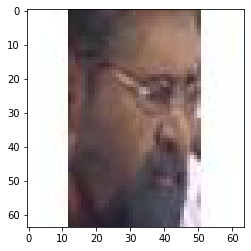

In [10]:
random_idx = np.random.randint(0,X_train.shape[0],1)
random_image = X_train[random_idx][0]
random_img_label = class_list[np.argmax(Y_train[random_idx], axis=1)[0]]
#print(random_image)
print(random_img_label)
plt.imshow(random_image[:,:,:])
plt.show()

In [11]:
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = Dropout(0.5)(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(512, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model_cnn = Model(model_input, model_output)
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
__________

In [13]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['acc'])

In [14]:
# Train
es = EarlyStopping(mode='auto', monitor='val_loss', patience=3)
model_history = model_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=512, verbose=2, shuffle=True, callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 1000 samples
Epoch 1/500
 - 122s - loss: 6.8016 - acc: 0.4697 - val_loss: 7.7850 - val_acc: 0.5170
Epoch 2/500
 - 14s - loss: 7.9462 - acc: 0.5070 - val_loss: 7.7850 - val_acc: 0.5170
Epoch 3/500
 - 14s - loss: 7.9462 - acc: 0.5070 - val_loss: 7.7850 - val_acc: 0.5170
Epoch 4/500
 - 14s - loss: 7.9462 - acc: 0.5070 - val_loss: 7.7850 - val_acc: 0.5170


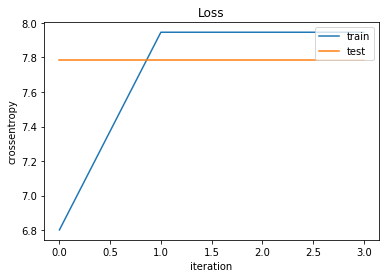

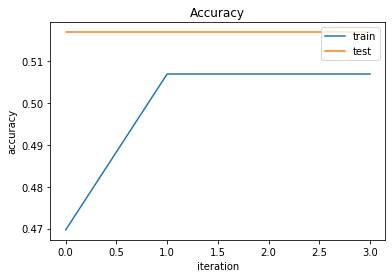

In [15]:
# Validation: Curve Plotting
# Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

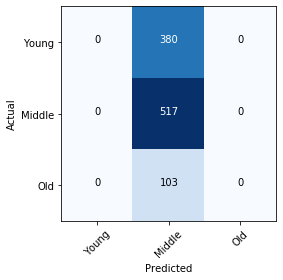

In [16]:
# Confusion Matrix
# Validation: Confusion Matrix Analysis
def plot_confusion_matrix(model_input, feature, label, class_info):
    pred = model_input.predict(feature)
    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45), plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i,j]>thresh else 'black')
    plt.ylabel('Actual'), plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(model_cnn, X_test, Y_test, class_info=class_list)